## Data Analysis on Aviation

Gloria Pintado

**Business Problem**

This company wants to start a new path of industry in their company and wants to start in the industry of 
airplanes. They want to know which aircraft have less risk of having accidents for them to buy it and start operating
airplanes.

The goal for this to be achieved is to gather important data about aviation in the past to be able to make recommendations about which aircraft is better and some other factors that make these airplanes have accidents.

In [2]:
# importing what we will need
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime
import warnings 

warnings.filterwarnings('ignore')

In [83]:
ls ../data

Aviation_Data.csv


In [4]:
# loading dataset that we will be using 
df = pd.read_csv('../data/Aviation_Data.csv')

## Exloring Data

Exploring data to have a better look at what data we will be working with and see if data has missing values in order to do the next step, which is data cleaning the dataset.

In [85]:
# display the first 5 rows from the DataFrame
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [86]:
#to see how many rows and columns the DataFrame has.
df.shape

(90348, 31)

In [87]:
#prints information that the DataFrame contains such as numberof colummns, columns labels, column data types,
#such as numberof colummns, columns labels, column data types, memory usage, range index, and number of cells in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [88]:
# this is used to calculate some statiscical data on numerical values of Series or DataFrame
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [89]:
# This will returns the number which has Nan values in the DataFrame
df.isna().sum()/len(df) *100

Event.Id                   1.614867
Investigation.Type         0.000000
Accident.Number            1.614867
Event.Date                 1.614867
Location                   1.672422
Country                    1.865011
Latitude                  61.944924
Longitude                 61.954886
Airport.Code              44.512330
Airport.Name              41.665560
Injury.Severity            2.721698
Aircraft.damage            5.150086
Aircraft.Category         64.263736
Registration.Number        3.144508
Make                       1.684597
Model                      1.716695
Amateur.Built              1.727764
Number.of.Engines          8.348829
Engine.Type                9.468942
FAR.Description           64.555939
Schedule                  86.073848
Purpose.of.flight          8.468367
Air.carrier               81.573471
Total.Fatal.Injuries      14.233851
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Uninjured            8.158454
Weather.Condition          6

In [90]:
# will give you all the columns labels the DataFrame has
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

**Some things we have notice :**
- We will be working we many columns however some columns has many missing values
- Need to convert Date to datetime
- Created a few new columns

## Data Cleaning 

From describing the data, we can see that there will be a lot of null values in each category. I will not be dropping
columns because I think we will lose a lot of information. I will be turning some category values into unknown values and some
other important categories, I will be filling them using the mode.

In [91]:
# here we will be filling up the Nan values into unknown values
df['Event.Id'].fillna('Unknown', inplace=True)
df['Accident.Number'].fillna('Unknown', inplace=True)
df['Location'].fillna('Unknown', inplace=True)
df['Airport.Code'].fillna('Unknown', inplace=True)
df['Airport.Name'].fillna('Unknown', inplace=True)
df['Aircraft.damage'].fillna('Unknown', inplace=True)
df['Aircraft.Category'].fillna('Unknown', inplace=True)
df['Make'].fillna('Unknown', inplace=True)
df['Model'].fillna('Unknown', inplace=True)
df['Amateur.Built'].fillna('Unknown', inplace=True)
df['FAR.Description'].fillna('Unknown', inplace=True)
df['Schedule'].fillna('Unknown', inplace=True)
df['Air.carrier'].fillna('Unknown', inplace=True)
df['Air.carrier'].fillna('Unknown', inplace=True)
df['Registration.Number'].fillna('Unknown', inplace=True)
df['Latitude'].fillna('Unknown', inplace=True)
df['Longitude'].fillna('Unknown', inplace=True)
df['Weather.Condition'].fillna('Unknown', inplace=True)
df['Injury.Severity'].fillna('Unknown', inplace=True)


In [92]:
# here we are using the mode since in category of number of engines there is a lot of airplanes having 1 engine
number_engines_mode = df['Number.of.Engines'].mode()
df['Number.of.Engines'].fillna(value = number_engines_mode, inplace = True)

In [93]:
# converting date to datetime 
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [94]:
# create new columns and remove data before 1985 since I think is irrevalent
df['Year'] = df['Event.Date'].dt.year
df['Month.Abbr'] = df['Event.Date'].dt.month_name().str[:3]
df['Day.Abbr'] = df['Event.Date'].dt.day_name().str[:3]
df = df[df['Year'] >= 1985]

In [95]:
#see the change we have made about
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month.Abbr,Day.Abbr
10613,20001214X35598,Accident,NYC85FNC02,1985-01-01,"HOPKINTON, NH",United States,Unknown,Unknown,LEB,"LEBANON, NH",...,2.0,0.0,0.0,IMC,Approach,Probable Cause,NaN,1985.0,Jan,Tue
10614,20001214X35495,Accident,DEN85FA055,1985-01-01,"EDGEWOOD, NM",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,0.0,0.0,IMC,Cruise,Probable Cause,NaN,1985.0,Jan,Tue
10615,20001214X35494,Accident,DCA85RA007,1985-01-01,"LA PAZ, Bolivia",Bolivia,Unknown,Unknown,LPB,LA PAZ INTERNATIONAL,...,0.0,0.0,0.0,UNK,NaN,Foreign,06-02-1995,1985.0,Jan,Tue
10616,20001214X35566,Accident,MIA85FA071,1985-01-01,"ODESSA, FL",United States,Unknown,Unknown,Unknown,Unknown,...,2.0,2.0,0.0,VMC,Maneuvering,Probable Cause,NaN,1985.0,Jan,Tue
10617,20001214X35463,Accident,ATL85LA075,1985-01-01,"DUBLIN, NC",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,0.0,1.0,VMC,Cruise,Probable Cause,NaN,1985.0,Jan,Tue


In [96]:
# just to see an update of what categories has some missing values now and start doing our analysis
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                     180
Latitude                      0
Longitude                     0
Airport.Code                  0
Airport.Name                  0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category             0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          5977
Engine.Type                7094
FAR.Description               0
Schedule                      0
Purpose.of.flight          6181
Air.carrier                   0
Total.Fatal.Injuries      11349
Total.Serious.Injuries    12447
Total.Minor.Injuries      11867
Total.Uninjured            5886
Weather.Condition             0
Broad.phase.of.flight     27153
Report.Status              6384
Publication.Date           8265
Year    

## Data Analysis 

Date vs. Accidents vs. Weather is what I will mainly focus on!


Analyze when accidents happen mostly and why may be the cause of them.

The date can also give powerful information about why there are the most accidents at those times of the year, if there are any.




In [97]:
# Get the number of accidents that have happened each year.
accidents_per_year = df.groupby(['Year'], as_index = False)['Event.Id'].count()
# Just get the first five rows 
accidents_per_year

,Year,Event.Id
0,1985.0,3096
1,1986.0,2880
2,1987.0,2828
3,1988.0,2730
4,1989.0,2544
5,1990.0,2518
6,1991.0,2462
7,1992.0,2355
8,1993.0,2313
9,1994.0,2257


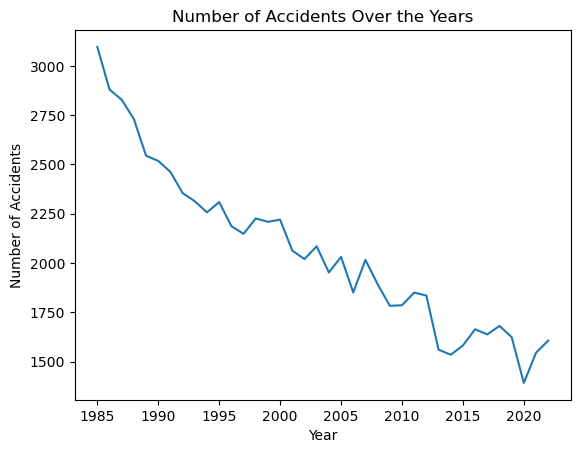

In [98]:
# Make a line graph of accidents that happen each year.
accidents_per_year = df['Year'].value_counts().sort_index()
plt.plot(accidents_per_year.index, accidents_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Over the Years')
plt.grid(False)
plt.show()

The following can be observed:
 - Accidents have been decreasing through the years.
 - Cleaned data shows information from the year 1985 to 2022.

In [99]:
# We will be grouping accidents that have happened in each month of every year.
accidents_per_month = df.groupby(['Month.Abbr'], as_index = False)['Event.Id'].count()
accidents_per_month

,Month.Abbr,Event.Id
0,Apr,6416
1,Aug,8772
2,Dec,4426
3,Feb,4601
4,Jan,4390
5,Jul,9466
6,Jun,8428
7,Mar,5881
8,May,7457
9,Nov,4862


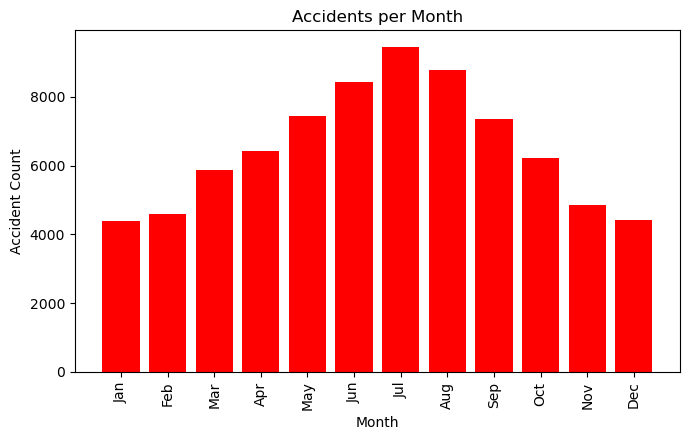

In [100]:
# Sorting the data by month order
sorted_data = accidents_per_month.sort_values(by='Month.Abbr', key=lambda x: [list(calendar.month_abbr).index(month) for month in x])

# Creating the bar graph
plt.figure(figsize=(7, 4.5))
plt.bar(sorted_data['Month.Abbr'], sorted_data['Event.Id'], color='red')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.title('Accidents per Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(False)

# Display the graph
plt.show()


- Most accidents has happened in the months of June, July and August.
- Summer time and most of the population is on vacation in the United States.
- Maybe there are too many flights? Maybe it's the weather conditions? We'll find out!


In [101]:
# See the monthly flight count that each year had in order to know why there were too many accidents in July, June, and August.
monthly_flights = df.groupby(['Year','Month.Abbr'])['Event.Id'].nunique()
print(monthly_flights)

Year    Month.Abbr
1985.0  Apr           273
        Aug           339
        Dec           172
        Feb           188
        Jan           171
                     ... 
2022.0  Mar           128
        May           134
        Nov            93
        Oct           136
        Sep           154
Name: Event.Id, Length: 456, dtype: int64


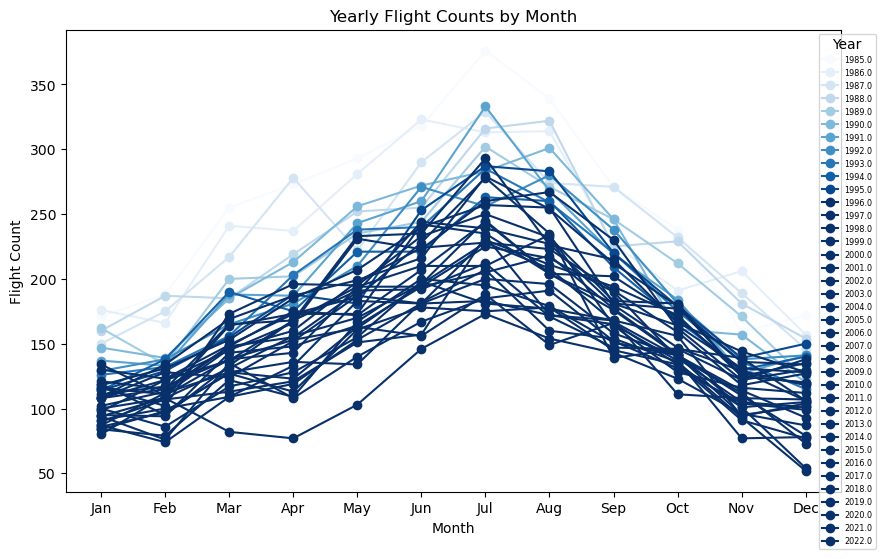

In [119]:
# Convert the multi-index Series to a DataFrame
monthly_flights_df = monthly_flights.unstack()

# Reorder months for proper chronological order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_flights_df = monthly_flights_df.reindex(columns=month_order)

# Transpose the DataFrame to have years as rows and months as columns
transposed_df = monthly_flights_df.T

# Create a line graph where each line represents a year
plt.figure(figsize=(10, 6))

color_map = plt.cm.get_cmap('Blues', len(transposed_df))

for idx, year in enumerate(transposed_df.columns):
    plt.plot(transposed_df.index, transposed_df[year], marker='o', label=year, color=color_map(idx))

plt.title('Yearly Flight Counts by Month')
plt.xlabel('Month')
plt.ylabel('Flight Count')
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.05, 1), fontsize='xx-small')
plt.grid(False)
plt.show()


The following observations can be made:
 - There has been a pattern for a long time where June, July, and August have more accidents than other months.
 - There is a season where most of these accidents happen.

In [102]:
 df['Weather.Condition'].value_counts()

Weather.Condition
VMC        67797
IMC         5044
Unknown     4491
UNK          682
Unk          262
Name: count, dtype: int64

In [103]:
injury_data = df[df['Injury.Severity'] != 'Unavailable']

In [104]:
df['Injury.Severity'] = df['Injury.Severity'].str.split('(').str[0]
df['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal      59083
Fatal          15876
Incident        1830
Unknown         1000
Minor            218
Serious          173
Unavailable       96
Name: count, dtype: int64

In [105]:
# Filter data for IMC and VMC accidents
imc_accidents = df[df['Weather.Condition'] == 'IMC']
vmc_accidents = df[df['Weather.Condition'] == 'VMC']

In [106]:
# Count non-fatal and fatal accidents for IMC
imc_non_fatal = imc_accidents[imc_accidents['Injury.Severity'] == 'Non-Fatal']
imc_fatal = imc_accidents[imc_accidents['Injury.Severity'] == 'Fatal']

# Count non-fatal and fatal accidents for VMC
vmc_non_fatal = vmc_accidents[vmc_accidents['Injury.Severity'] == 'Non-Fatal']
vmc_fatal = vmc_accidents[vmc_accidents['Injury.Severity'] == 'Fatal']

# Get the counts
num_imc_non_fatal = len(imc_non_fatal)
num_imc_fatal = len(imc_fatal)
num_vmc_non_fatal = len(vmc_non_fatal)
num_vmc_fatal = len(vmc_fatal)

print("Number of non-fatal accidents under IMC:", num_imc_non_fatal)
print("Number of fatal accidents under IMC:", num_imc_fatal)
print("Number of non-fatal accidents under VMC:", num_vmc_non_fatal)
print("Number of fatal accidents under VMC:", num_vmc_fatal)


Number of non-fatal accidents under IMC: 1879
Number of fatal accidents under IMC: 2979
Number of non-fatal accidents under VMC: 55107
Number of fatal accidents under VMC: 10896


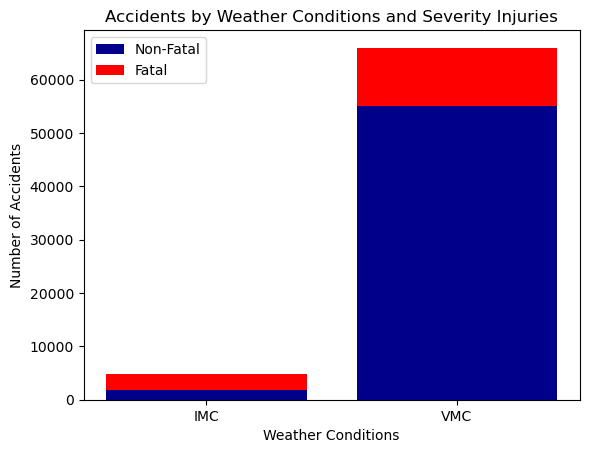

In [107]:
# Count non-fatal and fatal accidents for IMC
imc_non_fatal = len(imc_accidents[imc_accidents['Injury.Severity'] == 'Non-Fatal'])
imc_fatal = len(imc_accidents[imc_accidents['Injury.Severity'] == 'Fatal'])

# Count non-fatal and fatal accidents for VMC
vmc_non_fatal = len(vmc_accidents[vmc_accidents['Injury.Severity'] == 'Non-Fatal'])
vmc_fatal = len(vmc_accidents[vmc_accidents['Injury.Severity'] == 'Fatal'])

# Create a stacked bar plot
labels = ['IMC', 'VMC']
non_fatal_values = [imc_non_fatal, vmc_non_fatal]
fatal_values = [imc_fatal, vmc_fatal]

plt.bar(labels, non_fatal_values, label='Non-Fatal', color='darkblue')
plt.bar(labels, fatal_values, bottom=non_fatal_values, label='Fatal', color='red')

plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Weather Conditions and Severity Injuries')
plt.legend()
plt.show()


In [5]:
df.to_csv('clean_Aviation_Data.csv')